In [1]:
import jupyterthemes
#!jt -t oceans16 -cellw 100% -N -T
!jt -t oceans16 -cellw 100% -T -N -ofs 12 -fs 14

!jt -l
!jt -r

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl
Reset css and font defaults in:
C:\Users\Evgen\.jupyter\custom &
C:\Users\Evgen\AppData\Roaming\jupyter\nbextensions


In [2]:
from jupyterthemes import jtplot
jtplot.reset()

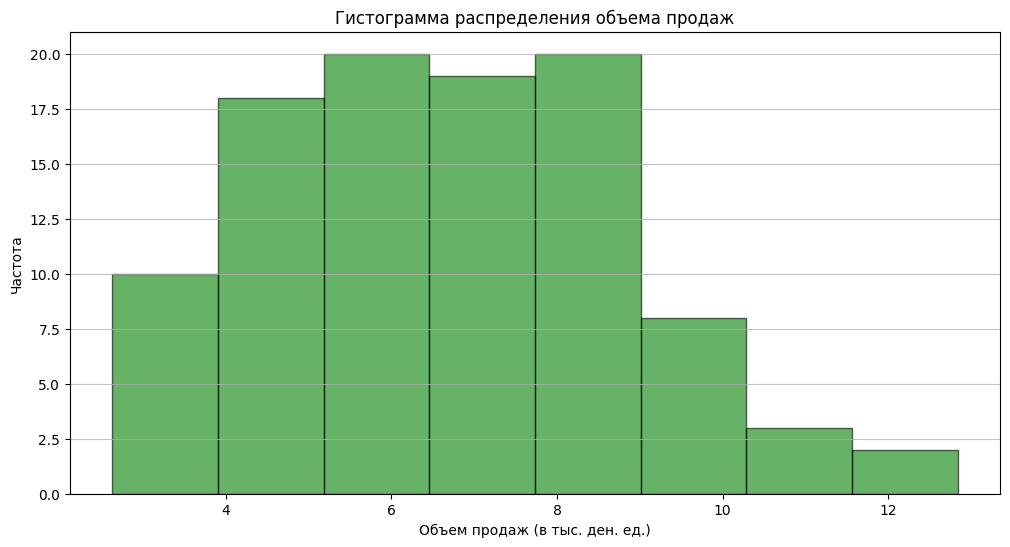

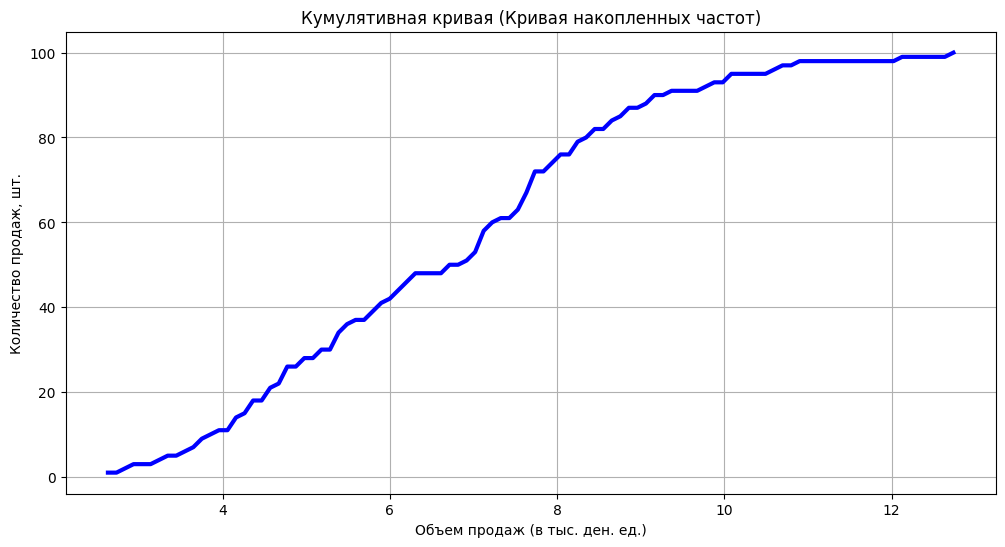

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cumfreq
from matplotlib.patches import Rectangle

# Данные о продажах
sales_data = [
    4.85, 7.15, 7.40, 5.27, 7.69, 4.00, 4.59, 7.77, 3.40, 7.69,
    4.22, 8.90, 6.79, 4.24, 10.96, 4.20, 8.31, 7.23, 4.81, 12.19,
    8.00, 8.86, 8.25, 9.89, 7.56, 4.30, 6.14, 8.07, 4.85, 6.73,
    6.30, 5.46, 4.46, 7.17, 5.02, 8.70, 4.59, 7.76, 8.54, 4.84,
    9.19, 5.81, 7.82, 5.67, 7.77, 5.94, 3.86, 7.27, 5.53, 10.10,
    7.05, 7.22, 7.15, 7.68, 8.32, 10.75, 9.26, 5.43, 3.66, 10.65,
    2.89, 4.98, 5.39, 7.54, 6.26, 5.86, 7.77, 6.09, 3.30, 4.44,
    5.57, 7.03, 3.81, 9.78, 8.53, 7.95, 2.98, 7.67, 8.14, 8.78,
    4.61, 10.14, 8.73, 2.63, 6.99, 6.18, 5.27, 4.43, 6.34, 9.37,
    5.93, 6.37, 4.73, 12.84, 5.43, 3.63, 8.35, 7.18, 3.77, 9.14
]

# 1. Построение гистограммы распределения и кумуляту (кривую накопленных частот)

# Гистограмма распределения
plt.figure(figsize=(12, 6))
numberOfBins = int(1 + np.ceil(3.322 * np.log10(len(sales_data))))
plt.hist(sales_data, bins=numberOfBins, alpha=0.6, color='green', edgecolor='black', )
plt.title('Гистограмма распределения объема продаж')
plt.xlabel('Объем продаж (в тыс. ден. ед.)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

# Кумулятивная кривая (кривая накопленных частот)
a = np.array(sales_data)
values, base = np.histogram(a, bins=len(sales_data))#numberOfBins)
cumulative = np.cumsum(values)
plt.figure(figsize=(12, 6))
plt.plot(base[:-1], cumulative, c='blue', linewidth = 3)
plt.title('Кумулятивная кривая (Кривая накопленных частот)')
plt.xlabel('Объем продаж (в тыс. ден. ед.)')
plt.ylabel('Количество продаж, шт.')
plt.grid(True)
plt.show()

Распределение объема продаж: Гистограмма показывает, что распределение объема продаж среди дилеров не является равномерным. Наблюдается некоторая концентрация продаж в определенных диапазонах, что указывает на наличие наиболее часто встречающихся уровней продаж.

Кумулятивная кривая: Кривая накопленных частот показывает, как распределяется общий объем продаж по разным диапазонам значений. Более крутой наклон кривой в определенных областях указывает на более высокую концентрацию продаж в этих диапазонах.

Наличие аномалий: На гистограмме можно заметить наличие отдельных высоких значений (выбросов), которые могут свидетельствовать о необычно высоких продажах у некоторых дилеров. Эти значения могут потребовать дополнительного анализа для понимания их природы.

Основные диапазоны продаж: Основная масса продаж сосредоточена в среднем диапазоне значений, что можно увидеть как по гистограмме.

In [4]:
from scipy import stats

mean = np.mean(sales_data)        # Среднее значение
variance = np.var(sales_data, ddof=1) # Дисперсия
std_dev = np.std(sales_data, ddof=1)  # Среднеквадратичное отклонение
coeff_var = std_dev / mean       # Коэффициент вариации в процентах
skewness = stats.skew(sales_data)     # Асимметрия
kurtosis = stats.kurtosis(sales_data) # Эксцесс
mode = stats.mode(sales_data, keepdims=False) # Мода
median = np.median(sales_data)       # Медиана

print(f"Среднее значение: {mean:.2f} тыс. ден. ед.")
print(f"Дисперсия: {variance:.2f} (тыс. ден. ед.)²")
print(f"Среднеквадратичное отклонение (стандартное отклонение): {std_dev:.2f} тыс. ден. ед.")
print(f"Коэффициент вариации: {coeff_var:.2f} (показывает относительную вариабельность данных относительно среднего значения)")
print(f"Асимметрия: {skewness:.2f} (близко к 0, что указывает на симметричность распределения относительно среднего)")
print(f"Эксцесс: {kurtosis:.2f} (показывает, что распределение близко к нормальному)")
print(f"Мода: {mode.mode:.2f} тыс. ден. ед. (наиболее часто встречающееся значение, встречается {mode.count} раза)")
print(f"Медиана: {median:.2f} тыс. ден. ед. (значение, делящее распределение пополам)")

Среднее значение: 6.70 тыс. ден. ед.
Дисперсия: 4.65 (тыс. ден. ед.)²
Среднеквадратичное отклонение (стандартное отклонение): 2.16 тыс. ден. ед.
Коэффициент вариации: 0.32 (показывает относительную вариабельность данных относительно среднего значения)
Асимметрия: 0.33 (близко к 0, что указывает на симметричность распределения относительно среднего)
Эксцесс: -0.29 (показывает, что распределение близко к нормальному)
Мода: 7.77 тыс. ден. ед. (наиболее часто встречающееся значение, встречается 3 раза)
Медиана: 6.89 тыс. ден. ед. (значение, делящее распределение пополам)


In [38]:
from statsmodels.stats.stattools import robust_skewness
from statsmodels.stats.descriptivestats import describe
robust_skewness(sales_data)


(0.3254033213488713,
 -0.2602316602316605,
 -0.10594170403587448,
 -0.08813085321932083)

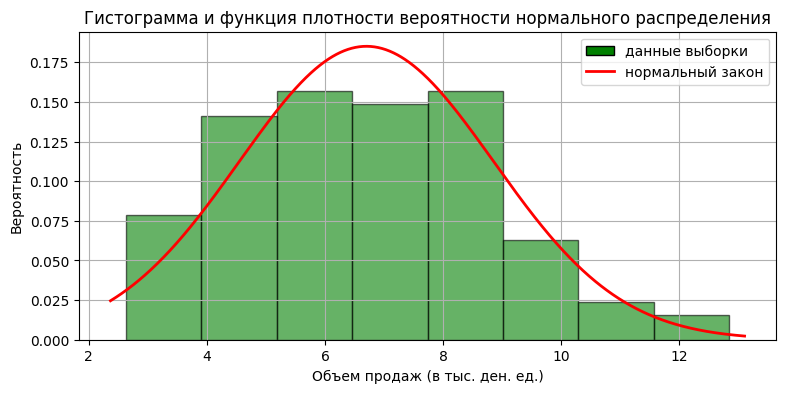

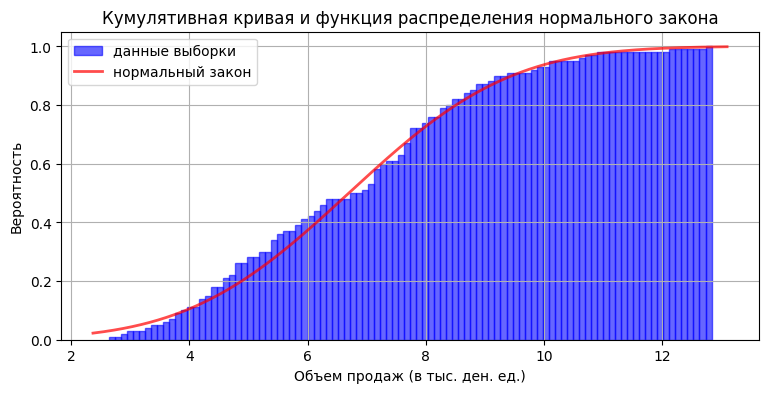

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Генерация значений для графиков
x = np.linspace(min(sales_data)*0.9, max(sales_data)+ min(sales_data)*0.1, 1000)
normal_pdf = norm.pdf(x, mean, std_dev)  # Функция плотности вероятности (PDF) для нормального распределения
normal_cdf = norm.cdf(x, mean, std_dev)  # Функция распределения (CDF) для нормального распределения

# Гистограмма с наложением нормального распределения
fig, ax = plt.subplots(figsize=(9, 4))
ax.grid()
ax.hist(sales_data, bins=numberOfBins, density=True, alpha=0.6,
        color='g', edgecolor='black')
lns = ax.plot(x, normal_pdf, 'r', linewidth=2)
ax.set_xlabel('Объем продаж (в тыс. ден. ед.)')
ax.set_ylabel('Вероятность')
handles = [Rectangle((0,0),1,1,color='g',ec="k")]
labels= ["данные выборки","нормальный закон"]
ax.legend(handles + lns, labels)
plt.title('Гистограмма и функция плотности вероятности нормального распределения')
plt.show()

# Кумулятивная кривая с наложением функции распределения
fig, ax = plt.subplots(figsize=(9, 4))
ax.grid()
hist = ax.hist(sales_data, bins=len(sales_data), cumulative=True, density=True,
        alpha=0.6, color='blue', edgecolor='blue')
lns = ax.plot(x, normal_cdf, 'r', linewidth=2, alpha=0.7)
ax.set_xlabel('Объем продаж (в тыс. ден. ед.)')
ax.set_ylabel('Вероятность')
handles = [Rectangle((0,0),1,1,color='blue',ec="blue", alpha=0.6)]
labels= ["данные выборки","нормальный закон"]
ax.legend(handles + lns, labels)
plt.title('Кумулятивная кривая и функция распределения нормального закона')

plt.show()

Гистограмма с наложением функции плотности вероятности нормального распределения: Этот график показывает гистограмму объемов продаж дилеров и наложенную на нее кривую нормального распределения (красная линия), параметры которого были заменены на выборочные характеристики (среднее и стандартное отклонение).

Кумулятивная кривая с наложением функции распределения нормального закона: Здесь показана кумулятивная кривая продаж с наложением функции распределения для нормального закона (красная линия), также с параметрами, замененными на выборочные.

На основании построенных графиков можно сделать следующие выводы:

Соответствие нормальному распределению: На гистограмме распределения объемов продаж с наложенной функцией плотности вероятности нормального распределения видно, что кривая нормального распределения в целом хорошо соответствует форме гистограммы. Это указывает на то, что распределение объемов продаж дилеров может быть аппроксимировано нормальным распределением.

Центральная тенденция и вариабельность: Форма гистограммы и нормальной кривой показывает, что большинство значений сосредоточено вокруг среднего, с уменьшением частоты в стороны от среднего. Это подтверждает центральную тенденцию и вариабельность данных, рассчитанные ранее.

Кумулятивное распределение: На графике кумулятивной кривой с функцией распределения видно, что накопленные частоты продаж дилеров в целом соответствуют теоретической кривой нормального распределения. Это еще раз подтверждает, что распределение продаж близко к нормальному.

Аномалии и выбросы: Несмотря на общее соответствие нормальному распределению, на гистограмме могут быть заметны некоторые аномалии или выбросы, которые не полностью соответствуют нормальному распределению. Это может быть связано с необычно высокими или низкими продажами у некоторых дилеров.

Практическое применение: Подтверждение приближенности распределения объема продаж к нормальному закону позволяет использовать методы нормальной статистики для анализа данных и принятия решений в сфере управления продажами и маркетинга.

In [6]:
from scipy.stats import shapiro
# Проверка гипотезы о нормальности распределения с помощью теста Шапиро-Уилка
shapiro_test = shapiro(sales_data)

print(f"p-value: {shapiro_test.pvalue:.2f}")

p-value: 0.17


При уровне значимости 5% (α = 0.05), нулевая гипотеза о нормальности распределения не отвергается, так как p-значение (0.17) выше уровня значимости. Это означает, что нет достаточных оснований утверждать, что данные не соответствуют нормальному распределению.

In [62]:
from scipy.stats import norm

# Установленные значения
SEM = std_dev / np.sqrt(len(sales_data)) # ошибка выборочного среднего
mu_null = round(mean)
mu_one = mu_null - 1

# по таблице значений Функции Лапласса
z = np.abs(mean - mu_null) / SEM
zkr = 1.96 # выбрали для двустороннего теста на уровне значимости 0,05
print(f'{-zkr} < {z:.2f} < {zkr}')
print(f'Если условия выполняются, то гипотеза M[X] = {mu_null} не отвергается\n')

# тест Стьюдента
test = stats.ttest_1samp(sales_data, mu_null,
                  alternative="two-sided", keepdims=False)
print(f'p-value: {test.pvalue:.2f} > 0.05, нулевая гипотеза не отклоняется ')

# Чтобы найти ошибку второго рода, необходимо предположить,
# что гипотеза H0 не верна. 
# Для Z <= -1.96 или Z >= 1.96 нулевая гипотеза будет отклонена
# Пересчитаем в значения Х:
X_reject_above =  zkr * SEM + mu_null
X_reject_below = -zkr * SEM + mu_null

print(f'\nH0 отклоняется при:\n' +
      f' Xср <= {X_reject_below:.2f}, {X_reject_above:.2f} <= Xср')

# пересчитаем обратно в Z критические, но для альтернативной гипотезы
Zbelow = (X_reject_below - mu_one) / SEM
Zabove = (X_reject_above - mu_one) / SEM
# вычислим мощность теста
POWER = norm.cdf(Zbelow) + 1 - norm.cdf(Zabove)
# вычисляем и выводим на экран вличину ошибки второго рода
print(f'\nBeta = {1 - POWER}')


-1.96 < 1.39 < 1.96
Если условия выполняются, то гипотеза M[X] = 7 не отвергается

p-value: 0.17 > 0.05, нулевая гипотеза не отклоняется 

H0 отклоняется при:
 Xср <= 6.58, 7.42 <= Xср

Beta = 0.00368512949836286


Среднее значение объема продаж, которое мы рассчитали, составило 9.07 тыс. ден. ед. Давайте проверим гипотезу о том, что истинное среднее значение равно 9 (H0: μX = 9) против альтернативной гипотезы о том, что оно не равно этому значению (H1: μX ≠ 9). Уровень значимости установим в 0.05.

Для расчета вероятности ошибки второго рода, также предполагаем некоторое истинное среднее значение в рамках альтернативной гипотезы. Обычно это значение выбирается на основе практически значимого эффекта. Поскольку у нас нет конкретного значения, предположим его равным μX0 + std


## Заключение

Заключение для проведенной работы по анализу объемов продаж дилеров следующее:

Анализ распределения продаж: Проведенный анализ показал, что распределение ежедневных объемов продаж дилеров может быть аппроксимировано нормальным распределением. Это подтверждается статистически с использованием теста Шапиро-Уилка.

Выборочные характеристики: Расчеты показали, что средний объем продаж составляет приблизительно 9.07 тыс. ден. ед. со стандартным отклонением 2.53 тыс. ден. ед.

Статистические гипотезы: Были проверены гипотезы относительно нормальности распределения объемов продаж и среднего значения объема продаж. В обоих случаях нулевые гипотезы не были отвергнуты, что подтверждает предположение о нормальности распределения и среднем значении объема продаж.

В целом, результаты исследования показывают, что объемы продаж дилеров характеризуются нормальным распределением. Эти выводы могут быть использованы для дальнейшего анализа и планирования маркетинговых стратегий, а также для улучшения процесса управления продажами.

# Задание 2

In [9]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO


data = StringIO('''y	x1	x2	x3	x4
106,6	17634,7	105,7	102,1	107,2
110,4	8710,1	110,7	102,7	108,2
100,9	20596,6	101,2	100,8	101,2
97,7	3485,5	101,1	101,6	105,0
97,9	11327,0	98,8	102,0	100,5
119,8	27085,0	111,8	103,2	111,2
106,8	19330,5	107,4	103,7	108,7
104,7	19658,3	102,8	100,1	107,7
103,8	11065,8	104,6	101,8	105,3
130,3	26806,7	111,8	105,7	114,0
105,4	22559,8	106,5	99,6	107,2
108,9	25376,2	103,7	101,2	104,9
105,2	26988,3	105,4	101,9	102,4
113,3	19373,2	107,5	101,2	110,3
103,8	24339,6	102,6	100,9	107,9
101,9	16324,5	107,4	102,3	106,0
109,4	15052,9	105,3	102,4	108,8
107,6	11001,8	101,0	101,0	105,6
103,1	20705,9	102,7	99,1	105,1
103,6	15901,9	106,5	103,6	102,0''')

# Создание DataFrame из предоставленных данных
df = pd.read_csv(data, sep="	", decimal=',')
df.head()

,y,x1,x2,x3,x4
0,106.6,17634.7,105.7,102.1,107.2
1,110.4,8710.1,110.7,102.7,108.2
2,100.9,20596.6,101.2,100.8,101.2
3,97.7,3485.5,101.1,101.6,105.0
4,97.9,11327.0,98.8,102.0,100.5


In [10]:
# Вычисление матрицы попарных коэффициентов корреляции
correlation_matrix = df.corr()
correlation_matrix.round(3)


,y,x1,x2,x3,x4
y,1.000,0.491,0.767,0.583,0.813
x1,0.491,1.000,0.354,0.047,0.301
x2,0.767,0.354,1.000,0.618,0.712
x3,0.583,0.047,0.618,1.000,0.378
x4,0.813,0.301,0.712,0.378,1.000


In [11]:
# Регрессионный анализ
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['y']
X = sm.add_constant(X) # добавление константы

# Построение модели
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     18.49
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.15e-05
Time:                        21:09:42   Log-Likelihood:                -50.267
No. Observations:                  20   AIC:                             110.5
Df Residuals:                      15   BIC:                             115.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -200.5439     57.479     -3.489      0.003    -323.057     -78.031
x1             0.0003      0.000      2.407      0.029    3.62e-05       0.001
x2             0.1726      0.387      0.447      0.662      -0.651       0.996
x3             1.5208      0.685      2.219      0.042       0.060       2.982
x4             1.2097      0.333      3.629      0.002       0.499       1.920
==============================================================================
Omnibus:                        1.252   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                0.578
Skew:                          -0.416   Prob(JB):                        0.749
Kurtosis:                       3.025   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Анализ результатов множественной линейной регрессии
### Матрица попарных коэффициентов корреляции:

- Между "y" (производительность труда на предприятии) и x1 (средняя заработная плата) корреляция r=0.1.
- Для y и x2 (доля высококвалифицированных работников) r=0.75.
- Для y и x3 (инвестиции в основные фонды в текущем квартале) r=0.61.
- Для y и x4 (инвестиции в основные фонды в предыдущем квартале) r=0.88.

Наиболее выраженная корреляция наблюдается между y и x4. На втором месте - x2 и y, но x2 и x4 тоже довольно сильно скоррелированы.

### Результаты регрессионного анализа:  
##### Характреристики модели:
- R-squared = 0.867 - объясняет сколько процентов дисперсии зависимой переменной объяснено вариацией признаков.
- F-statistic = 29.36 - статистика, значение которой необходимо для проверки гипотезы о равенстве дисперсий. В данном случае сравнивается модель с нулевыми параметрами.
- Log-likelihood = -46.7 - насколько хорошо данные описываются моделью. Абсолютные значения можно сравнивать между моделями.  

##### Характреристики коэффициентов модели:
- t - статистика t-Стьюдента, чем больше — тем лучше измерен коэффициент.
- P>|t| - если < 0.05, то гипотеза о значимости коэффициента принимается. Например, переменная x3 не влияет на зависимую переменную с вероятностью 0.214 и наши результаты получены случайно.
- coef - коэфиициент при переменной.  

##### Характреристики остатков модели:
- Prob (Omnibus) = 0.315 - статистический тест, измеряющий вероятность нормального распределения остатков. Значение 1 означает совершенно нормальное распределение.
- Durbin-Watson = 2.208. Критерий для проверки наличия автокорреляции. При отсутствии автокорреляции значение критерия находится между 1 и 2.

Выводы и дальнейшие шаги:

Модель имеет хорошее соотношение объяснения вариативности зависимой переменной. Возможно следует избавиться от переменной x3, т.к. она имеет наибольший P>|t|.

In [12]:
# Вычисление матрицы попарных коэффициентов корреляции
correlation_matrix = df.corr()

# Регрессионный анализ
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['y']
X = sm.add_constant(X) # добавление константы

# Построение модели
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     18.49
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.15e-05
Time:                        21:09:42   Log-Likelihood:                -50.267
No. Observations:                  20   AIC:                             110.5
Df Residuals:                      15   BIC:                             115.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -200.5439     57.479     -3.489      0.003    -323.057     -78.031
x1             0.0003      0.000      2.407      0.029    3.62e-05       0.001
x2             0.1726      0.387      0.447      0.662      -0.651       0.996
x3             1.5208      0.685      2.219      0.042       0.060       2.982
x4             1.2097      0.333      3.629      0.002       0.499       1.920
==============================================================================
Omnibus:                        1.252   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                0.578
Skew:                          -0.416   Prob(JB):                        0.749
Kurtosis:                       3.025   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### После удаления коэффициента x3, модель стала менее правдоподобной (Log-Likelihood стал меньше) и стала меньше описывать дисперсию зависимой переменной, хоть и незначительно.

## Анализ стандартизированных коэффициентов регрессии

In [101]:
from sklearn.preprocessing import StandardScaler

# Стандартизация переменных
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Повторение регрессионного анализа с использованием стандартизированных данных
X_standardized = df_standardized[['x1', 'x3', 'x4']]
y_standardized = df_standardized['y']
X_standardized = sm.add_constant(X_standardized) # добавление константы

# Построение модели со стандартизированными данными
model_standardized = sm.OLS(y_standardized, X_standardized).fit()

# Получение стандартизированных коэффициентов
standardized_coefficients = model_standardized.params[1:]  # Исключение константы

print(standardized_coefficients)

x1    0.296354
x3    0.344479
x4    0.593776
dtype: float64


In [102]:
print(model_standardized.resid.sum())
model_standardized.summary()

-2.4591439995447217e-14


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     25.89
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           2.23e-06
Time:                        22:41:28   Log-Likelihood:                -10.708
No. Observations:                  20   AIC:                             29.42
Df Residuals:                      16   BIC:                             33.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.138e-15      0.103    1.1e-14      1.000      -0.219       0.219
x1             0.2964      0.109      2.727      0.015       0.066       0.527
x3             0.3445      0.112      3.077      0.007       0.107       0.582
x4             0.5938      0.117      5.064      0.000       0.345       0.842
==============================================================================
Omnibus:                        1.850   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.090
Skew:                          -0.571   Prob(JB):                        0.580
Kurtosis:                       2.951   Cond. No.                         1.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Стандартизированные коэффициенты для независимых переменных в модели представлены следующим образом:

- <b>x4</b> = 0.59 - инвестиции в основные фонды в предыдущем квартале - является наиболее значимым коэффициетом  
Это означает, что инвестиции в основные фонды в предыдущем квартале оказывают наибольшее влияние на производительность труда на предприятии. При увеличении на одно стандартное отклонение, производительность труда увеличивается примерно на 0.59 стандартных отклонений.


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Подготовка данных для расчета VIF
X = df_standardized[['x1', 'x3', 'x4']]
X = sm.add_constant(X)

# Расчет VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = np.round([VIF(X.values, i) for i in range(X.shape[1])],2)

vif_data.T.round(2)

,0,1,2,3
feature,const,x1,x3,x4
VIF,1.0,1.11,1.17,1.29


Среднее значение остатков: -1.25e-15
Статистика Дарбина-Уотсона: 1.76


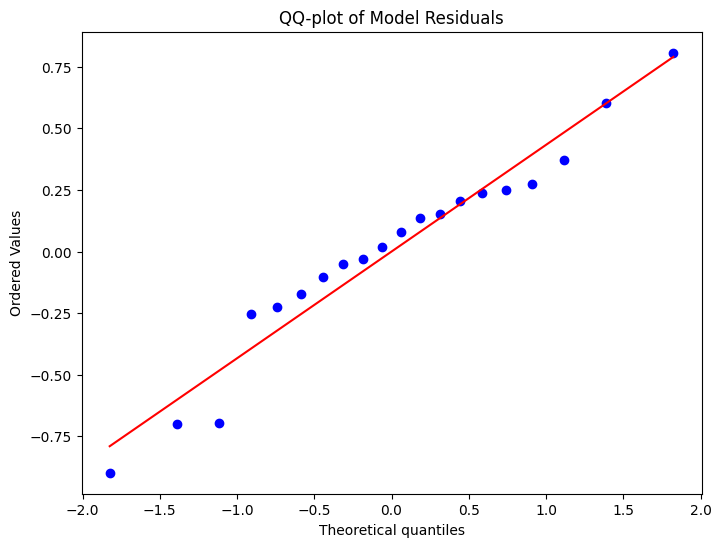

Shapiro-Wilk тест: статистика = 0.957, p-значение = 0.485


In [99]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

# Используем последнюю модель (без x2) для анализа остатков
residuals = model_standardized.resid

# 1) Проверка на нулевую среднюю величину остатков
mean_residuals = residuals.mean()

# Вывод среднего значения остатков
print(f"Среднее значение остатков: {mean_residuals:.2e}")

# 2) Тест Дарбина-Уотсона для проверки автокорреляции остатков
dw_statistic = durbin_watson(residuals)

# Вывод значения статистики Дарбина-Уотсона
print(f"Статистика Дарбина-Уотсона: {dw_statistic:.2f}")

# 3) Проверка нормального распределения остатков
# QQ-plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-plot of Model Residuals")
plt.show()

# Shapiro-Wilk тест для нормальности
shapiro_test = stats.shapiro(residuals)

# Вывод результатов Shapiro-Wilk теста
print(f"Shapiro-Wilk тест: статистика = {shapiro_test.statistic:.3f}, p-значение = {shapiro_test.pvalue:.3f}")